# 🧠 Tóm tắt quy trình huấn luyện mô hình: Real-Time Traffic Signs Classification (CNN & OpenCV)

Dưới đây là các bước tổng quát trong quá trình xây dựng mô hình nhận diện biển báo giao thông theo thời gian thực.

---

## 🎯 Mục tiêu:
Xây dựng mô hình CNN để **phân loại biển báo giao thông** từ ảnh đầu vào, có thể hoạt động **thời gian thực** với camera (OpenCV).

---

## 🧭 Quy trình các bước:

### 1. 📁 Tải dữ liệu & cấu hình ban đầu
- Giải nén file chứa dữ liệu ảnh (zip).
- Khai báo đường dẫn, thông số ảnh, tỷ lệ chia tập train/test/validation.
- `labels.csv` chứa tên các lớp biển báo.

---

### 2. 🖼️ Đọc ảnh & gán nhãn
- Lặp qua từng thư mục lớp → đọc ảnh bằng `cv2.imread()`.
- Gán nhãn dựa vào tên thư mục.
- Lưu ảnh và nhãn vào danh sách `images` và `classNo`.

---

### 3. ✂️ Chia tập dữ liệu
- Dùng `train_test_split` để chia:
  - `X_train`, `X_validation`, `X_test`
  - `y_train`, `y_validation`, `y_test`
- Đảm bảo việc đánh giá mô hình khách quan.

---

### 4. 📊 Trực quan phân bố dữ liệu
- Sử dụng biểu đồ cột (`plt.bar`) để kiểm tra số lượng ảnh trong từng lớp.

---

### 5. ⚙️ Tiền xử lý ảnh
- Chuyển ảnh sang **grayscale**
- Cân bằng sáng với **Histogram Equalization**
- Chuẩn hóa pixel về [0, 1]
- Thêm chiều kênh để có shape: `(32, 32, 1)`

---

### 6. 🧪 Tăng cường dữ liệu (Augmentation)
- Dùng `ImageDataGenerator`:
  - Xoay, zoom, dịch trái/phải, trên/dưới, shear
- Giúp mô hình học tốt hơn và **giảm overfitting**

---

### 7. 🔢 One-hot encoding nhãn
- Dùng `to_categorical()` để chuyển nhãn thành vector nhị phân:
  - Ex: `3 → [0, 0, 0, 1, ..., 0]`

---

### 8. 🧱 Xây dựng mô hình CNN
- Sử dụng `Sequential()`:
  - 4 lớp **Conv2D** với ReLU
  - 2 lớp **MaxPooling2D**
  - 2 lớp **Dropout**
  - 1 lớp **Dense(500)** + **Dense(softmax)**
- Compile với:
  - Optimizer: **Adam**
  - Loss: **categorical_crossentropy**

---

### 9. 🏋️‍♂️ Huấn luyện mô hình
- Dùng `model.fit()` kết hợp generator
- Xác thực sau mỗi epoch
- Số vòng lặp: `epochs = 10`

---

### 10. 📈 Trực quan hóa quá trình huấn luyện
- Biểu đồ:
  - `Loss`: train vs validation
  - `Accuracy`: train vs validation
- Phân tích overfitting hoặc underfitting

---

### 11. 🧪 Đánh giá mô hình
- Dùng `model.evaluate()` trên tập test
- In ra:
  - `Test Loss`
  - `Test Accuracy`

---

### 12. 💾 Lưu mô hình
- Dùng `pickle.dump(model, ...)` hoặc `model.save("model.h5")`
- Phục vụ cho inference thời gian thực mà không cần huấn luyện lại

---

## ✅ Kết luận:
Quy trình áp dụng chuẩn pipeline học sâu:

**➡️ Load → Tiền xử lý → Augment → Xây mô hình → Huấn luyện → Đánh giá → Lưu**

Mô hình có thể tích hợp dễ dàng với OpenCV để dự đoán biển báo **trực tiếp từ camera**.

---


In [1]:
!unzip myData.zip

Streaming output truncated to the last 5000 lines.
 extracting: myData/5/5_13244_1577672002.0758326.png  
 extracting: myData/5/5_13245_1577672002.0768187.png  
 extracting: myData/5/5_13246_1577672002.0768187.png  
 extracting: myData/5/5_13247_1577672002.0778143.png  
 extracting: myData/5/5_13248_1577672002.078812.png  
 extracting: myData/5/5_13249_1577672002.0798092.png  
 extracting: myData/5/5_13250_1577672002.0798092.png  
 extracting: myData/5/5_13251_1577672002.0808067.png  
 extracting: myData/5/5_13252_1577672002.0818043.png  
 extracting: myData/5/5_13253_1577672002.082801.png  
 extracting: myData/5/5_13254_1577672002.082801.png  
 extracting: myData/5/5_13255_1577672002.0837986.png  
 extracting: myData/5/5_13256_1577672002.084796.png  
 extracting: myData/5/5_13257_1577672002.0857933.png  
 extracting: myData/5/5_13258_1577672002.0857933.png  
 extracting: myData/5/5_13259_1577672002.0867918.png  
 extracting: myData/5/5_13260_1577672002.0877888.png  
 extracting: myDat

In [2]:
# Standard library
import os
import random
import pickle

# Data handling
import numpy as np
import pandas as pd

# Image processing
import cv2
from google.colab.patches import cv2_imshow

# Plotting
import matplotlib.pyplot as plt

# Machine learning utilities
from sklearn.model_selection import train_test_split

# Keras / TensorFlow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator


## PARAMETER

In [16]:
path = "myData"  # thư mục chứa tất cả các thư mục lớp
labelFile = 'labels.csv'  # tập tin chứa tên của tất cả các lớp
batch_size_val = 50  # số lượng ảnh xử lý cùng lúc
steps_per_epoch_val = 2000
epochs_val = 30
imageDimesions = (32, 32, 3)
testRatio = 0.2  # nếu có 1000 ảnh thì 200 ảnh dùng để kiểm tra
validationRatio = 0.2  # nếu còn lại 800 ảnh thì 20% là 160 ảnh dùng để xác thực


## IMPORTING OF THE IMAGES




In [17]:
count = 0  # biến đếm dùng để duyệt qua các lớp
images = []  # danh sách chứa tất cả hình ảnh được đọc
classNo = []  # danh sách chứa labels (số lớp tương ứng) của mỗi hình ảnh
myList = os.listdir(path)  # lấy danh sách tất cả thư mục con trong thư mục 'path', mỗi thư mục là một lớp
print("Total Classes Detected:", len(myList))
noOfClasses = len(myList)
print("Importing Classes.....")

# vòng lặp qua từng thư mục lớp
for x in range(0, len(myList)):
    myPicList = os.listdir(path + "/" + str(count))  # lấy danh sách tất cả hình ảnh trong thư mục lớp hiện tại
    for y in myPicList:  # lặp qua từng ảnh trong lớp
        curImg = cv2.imread(path + "/" + str(count) + "/" + y)  # đọc hình ảnh hiện tại bằng OpenCV
        images.append(curImg)  # thêm hình ảnh vào danh sách images
        classNo.append(count)  # thêm nhãn tương ứng vào danh sách classNo
    print(count, end=" ")  # in ra số lớp hiện tại (giúp theo dõi tiến trình)
    count += 1

print(" ")

# chuyển danh sách hình ảnh và nhãn sang dạng mảng numpy để dễ xử lý sau này
images = np.array(images)
classNo = np.array(classNo)


Total Classes Detected: 43
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  


## SPLIT DATA

In [18]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
# Tách tập dữ liệu ban đầu thành tập huấn luyện (train) và tập kiểm tra (test)
# test_size=testRatio nghĩa là phần trăm dữ liệu dành cho kiểm tra

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)
# Từ tập huấn luyện ban đầu, tiếp tục tách ra một phần để làm tập xác thực (validation)
# test_size=validationRatio nghĩa là phần trăm của tập huấn luyện được dùng làm tập xác thực

# X_train = MẢNG CHỨA HÌNH ẢNH DÙNG ĐỂ HUẤN LUYỆN
# y_train = MẢNG CHỨA CÁC NHÃN TƯƠNG ỨNG VỚI HÌNH ẢNH HUẤN LUYỆN


## TO CHECK IF NUMBER OF IMAGES MATCHES TO NUMBER OF LABELS FOR EACH DATA SET

In [19]:
print("Data Shapes")  # In tiêu đề kiểm tra kích thước dữ liệu

print("Train", end="");
print(X_train.shape, y_train.shape)  # In kích thước tập huấn luyện: số ảnh và số nhãn tương ứng

print("Validation", end="");
print(X_validation.shape, y_validation.shape)  # In kích thước tập xác thực

print("Test", end="");
print(X_test.shape, y_test.shape)  # In kích thước tập kiểm tra

# Kiểm tra xem số lượng ảnh có bằng số lượng nhãn trong từng tập hay không
assert (X_train.shape[0] == y_train.shape[
    0]), "The number of images in not equal to the number of lables in training set"
assert (X_validation.shape[0] == y_validation.shape[
    0]), "The number of images in not equal to the number of lables in validation set"
assert (X_test.shape[0] == y_test.shape[0]), "The number of images in not equal to the number of lables in test set"

# Kiểm tra xem kích thước (chiều dài, chiều rộng, kênh màu) của ảnh có đúng như mong đợi không
assert (X_train.shape[1:] == (imageDimesions)), " The dimesions of the Training images are wrong "
assert (X_validation.shape[1:] == (imageDimesions)), " The dimesionas of the Validation images are wrong "
assert (X_test.shape[1:] == (imageDimesions)), " The dimesionas of the Test images are wrong"

Data Shapes
Train(22271, 32, 32, 3) (22271,)
Validation(5568, 32, 32, 3) (5568,)
Test(6960, 32, 32, 3) (6960,)


## READ CSV FILE

In [20]:
data = pd.read_csv(labelFile)
print("data shape ", data.shape, type(data))  # In ra kích thước (số dòng, số cột) và kiểu dữ liệu của biến 'data'

data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>


## DISPLAY SOME SAMPLES IMAGES  OF ALL THE CLASSES

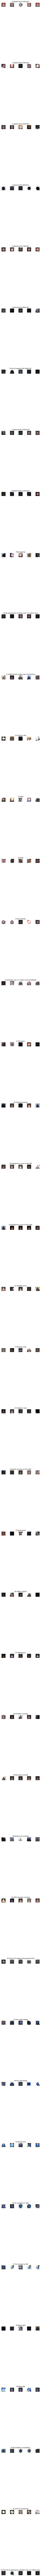

In [21]:
num_of_samples = []  # Danh sách lưu số lượng ảnh huấn luyện của từng lớp
cols = 5  # Số cột hình ảnh hiển thị mỗi lớp
num_classes = noOfClasses  # Tổng số lớp (số nhãn khác nhau)

# Tạo lưới hiển thị ảnh gồm num_classes hàng và cols cột
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 300))
fig.tight_layout()  # Tự động điều chỉnh khoảng cách giữa các ảnh để tránh bị chồng lên nhau

# Vòng lặp qua số cột
for i in range(cols):
    # Vòng lặp qua từng lớp (j là chỉ số lớp, row là dữ liệu dòng tương ứng từ file CSV)
    for j, row in data.iterrows():
        # Lấy tất cả ảnh huấn luyện thuộc lớp j
        x_selected = X_train[y_train == j]

        # Chọn ngẫu nhiên một ảnh trong lớp để hiển thị tại vị trí (j, i)
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected) - 1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")  # Tắt hiển thị trục tọa độ

        # Chỉ gán tiêu đề ở cột giữa (cột thứ 3 – chỉ số 2)
        if i == 2:
            axs[j][i].set_title(str(j) + "-" + row["Name"])  # Hiển thị tên lớp và nhãn số
            num_of_samples.append(len(x_selected))  # Lưu số lượng ảnh trong lớp j


## DISPLAY A BAR CHART SHOWING NO OF SAMPLES FOR EACH CATEGORY

[117, 1251, 1252, 805, 1122, 1046, 233, 830, 792, 843, 1123, 744, 1192, 1243, 464, 352, 220, 634, 694, 110, 202, 163, 222, 291, 163, 854, 342, 133, 309, 147, 256, 465, 123, 373, 230, 708, 233, 111, 1231, 169, 209, 143, 127]


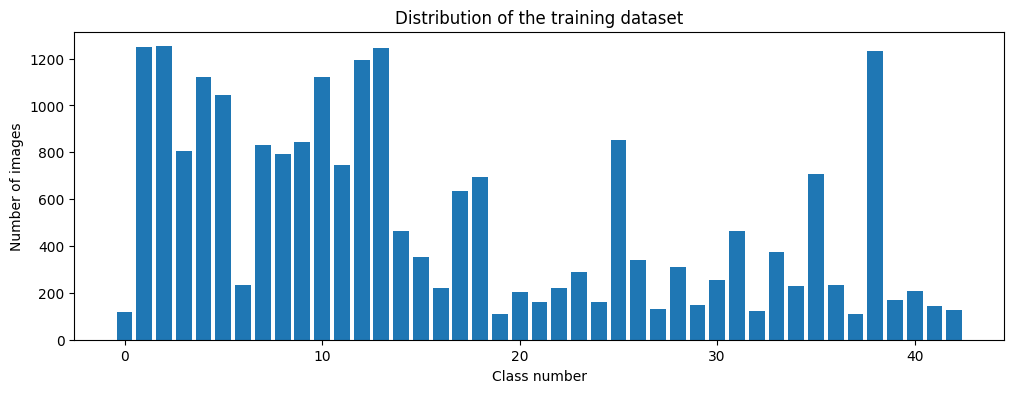

In [22]:
print(num_of_samples)  # In ra danh sách số lượng ảnh huấn luyện tương ứng với từng lớp

plt.figure(figsize=(12, 4))  # Tạo biểu đồ với kích thước 12x4 inch
plt.bar(range(0, num_classes), num_of_samples)  # Vẽ biểu đồ cột: trục x là số lớp, trục y là số lượng ảnh mỗi lớp
plt.title("Distribution of the training dataset")  # Tiêu đề biểu đồ: Phân bố của tập dữ liệu huấn luyện
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()


## PREPROCESSING THE IMAGES

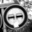

In [23]:
# Hàm chuyển ảnh sang ảnh xám (grayscale)
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Chuyển từ BGR sang grayscale
    return img

# Hàm cân bằng histogram để làm đều độ sáng trong ảnh
def equalize(img):
    img = cv2.equalizeHist(img)
    return img

# Hàm tiền xử lý ảnh bao gồm chuyển sang ảnh xám, cân bằng ánh sáng và chuẩn hóa pixel
def preprocessing(img):
    img = grayscale(img)       # Chuyển ảnh sang thang độ xám
    img = equalize(img)        # Cân bằng ánh sáng cho ảnh
    img = img / 255            # Chuẩn hóa giá trị pixel về khoảng [0, 1]
    return img

# Tiền xử lý toàn bộ ảnh trong các tập dữ liệu
X_train = np.array(list(map(preprocessing, X_train)))        # Tiền xử lý tập huấn luyện
X_validation = np.array(list(map(preprocessing, X_validation)))  # Tiền xử lý tập xác thực
X_test = np.array(list(map(preprocessing, X_test)))          # Tiền xử lý tập kiểm tra

# Kiểm tra hiển thị một ảnh ngẫu nhiên từ tập huấn luyện sau khi tiền xử lý
cv2_imshow(X_train[random.randint(0, len(X_train) - 1)] * 255)
# Nhân lại với 255 để hiển thị đúng màu vì ảnh đã chuẩn hóa về [0, 1]


## ADD A DEPTH OF 1

In [24]:
# Sau khi tiền xử lý, ảnh đã chuyển thành ảnh xám (grayscale) với kích thước (chiều cao, chiều rộng)
# Tuy nhiên, để dùng cho mô hình CNN, cần định hình lại để ảnh có định dạng 4 chiều:
# (số lượng ảnh, chiều cao, chiều rộng, số kênh) — trong đó số kênh là 1 (vì ảnh xám)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
# Định hình lại tập huấn luyện: thêm chiều kênh ảnh (1 kênh xám)

X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)
# Định hình lại tập xác thực

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
# Định hình lại tập kiểm tra


## AUGMENTATAION OF IMAGES: TO MAKEIT MORE GENERIC

In [25]:
# Tạo một đối tượng ImageDataGenerator để sinh ảnh mới bằng cách biến đổi ảnh gốc (data augmentation)
dataGen = ImageDataGenerator(
    width_shift_range=0.1,   # Dịch chuyển ngang tối đa 10% chiều rộng ảnh
    height_shift_range=0.1,  # Dịch chuyển dọc tối đa 10% chiều cao ảnh
    zoom_range=0.2,          # Phóng to/thu nhỏ ảnh trong khoảng từ 80% đến 120%
    shear_range=0.1,         # Áp dụng biến dạng xiên với độ nghiêng tối đa 10 độ
    rotation_range=10        # Xoay ảnh ngẫu nhiên trong khoảng ±10 độ
)

# Áp dụng các biến đổi augmentation cho tập huấn luyện
dataGen.fit(X_train)

# Tạo một lô dữ liệu (batch) từ generator: mỗi lần gọi sẽ sinh ra 20 ảnh đã được biến đổi kèm nhãn tương ứng
batches = dataGen.flow(X_train, y_train, batch_size=20)

# Lấy ra một lô ảnh và nhãn đầu tiên từ generator
X_batch, y_batch = next(batches)


## TO SHOW AGMENTED IMAGE SAMPLES

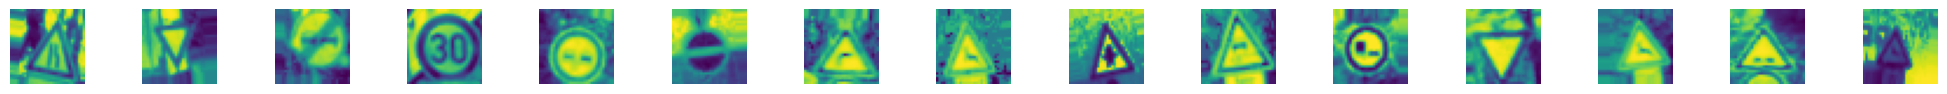

In [26]:
# Vẽ 15 ảnh đầu tiên trong một batch từ ImageDataGenerator để kiểm tra quá trình tăng cường dữ liệu (augmentation)
fig, axs = plt.subplots(1, 15, figsize=(20, 5))  # Tạo 1 hàng gồm 15 cột ảnh, mỗi ảnh có kích thước phù hợp để quan sát rõ
fig.tight_layout()  # Tự động căn chỉnh khoảng cách giữa các ảnh cho gọn gàng

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(imageDimesions[0], imageDimesions[1]))
    # Vì ảnh là ảnh xám (grayscale), có shape (32,32,1), cần reshape về (32,32) để hiển thị đúng
    axs[i].axis('off')  # Tắt trục x và y để ảnh hiển thị sạch sẽ, không bị rối

plt.show()  # Hiển thị toàn bộ 15 ảnh đã được tăng cường dữ liệu

# Chuyển nhãn từ dạng số nguyên (vd: 0, 1, 2, ...) sang dạng one-hot encoding
# Ví dụ: 2 với 5 lớp sẽ thành [0, 0, 1, 0, 0]
y_train = to_categorical(y_train, noOfClasses)
y_validation = to_categorical(y_validation, noOfClasses)
y_test = to_categorical(y_test, noOfClasses)

# Việc one-hot encoding này là rất quan trọng khi dùng hàm loss như categorical_crossentropy trong bài toán phân loại nhiều lớp


## CONVOLUTION NEURAL NETWORK MODEL

In [27]:
def myModel():
    no_Of_Filters = 60  # Số lượng bộ lọc (filter/kernels) cho các lớp Conv2D đầu tiên
    size_of_Filter = (5, 5)  # Kích thước bộ lọc (kernel) – 5x5
                             # Mỗi bộ lọc sẽ trượt trên ảnh để trích xuất đặc trưng
                             # Với ảnh 32x32, nếu không padding thì mỗi lần áp kernel sẽ làm giảm kích thước biên

    size_of_Filter2 = (3, 3)  # Kích thước bộ lọc nhỏ hơn ở lớp Conv tiếp theo (phân tích chi tiết hơn)
    size_of_pool = (2, 2)  # Kích thước của vùng pooling – giúp giảm chiều dữ liệu, tránh overfitting
    no_Of_Nodes = 500  # Số lượng node trong lớp ẩn (fully connected)

    model = Sequential()  # Khởi tạo mô hình dạng tuần tự (Sequential API)

    # Lớp Convolution đầu tiên – nhận đầu vào ảnh xám 32x32x1
    model.add(Conv2D(no_Of_Filters, size_of_Filter, input_shape=(imageDimesions[0], imageDimesions[1], 1), activation='relu'))

    # Lớp Convolution thứ 2 – cùng số filters và kích thước kernel
    model.add(Conv2D(no_Of_Filters, size_of_Filter, activation='relu'))

    # Lớp MaxPooling – giúp giảm chiều dữ liệu (không thay đổi số filters)
    model.add(MaxPooling2D(pool_size=size_of_pool))

    # Thêm 2 lớp Convolution khác với số lượng filters giảm còn một nửa
    model.add(Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu'))
    model.add(Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu'))

    # MaxPooling lần nữa
    model.add(MaxPooling2D(pool_size=size_of_pool))

    # Dropout – bỏ ngẫu nhiên 50% node trong lúc huấn luyện để giảm overfitting
    model.add(Dropout(0.5))

    # Chuyển feature map thành vector 1 chiều để đưa vào lớp Dense
    model.add(Flatten())

    # Lớp Dense ẩn – 500 node với hàm kích hoạt ReLU
    model.add(Dense(no_Of_Nodes, activation='relu'))

    # Dropout tiếp – tăng tính tổng quát
    model.add(Dropout(0.5))

    # Lớp đầu ra – số node bằng số lớp (noOfClasses), dùng softmax để phân loại đa lớp
    model.add(Dense(noOfClasses, activation='softmax'))

    # Biên dịch mô hình: dùng Adam optimizer, hàm mất mát là categorical_crossentropy (do đã one-hot encoding)
    model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model  # Trả về mô hình đã sẵn sàng huấn luyện


## TRAIN

In [28]:
model = myModel()  # Gọi hàm để tạo mô hình CNN theo kiến trúc đã định nghĩa trước

print(model.summary())  # In ra tóm tắt kiến trúc của mô hình: các lớp, kích thước đầu ra, số tham số cần học

# Huấn luyện mô hình bằng dữ liệu huấn luyện đã được tăng cường (augmentation)
history = model.fit(
    dataGen.flow(X_train, y_train, batch_size=batch_size_val),  # Dùng ImageDataGenerator để sinh ảnh ngẫu nhiên theo batch
    steps_per_epoch=steps_per_epoch_val,  # Số bước cập nhật trọng số mỗi epoch (1 bước = 1 batch)
    epochs=epochs_val,  # Số vòng lặp huấn luyện toàn bộ dữ liệu
    validation_data=(X_validation, y_validation),  # Dữ liệu xác thực dùng để đánh giá mô hình sau mỗi epoch
    shuffle=1  # Trộn dữ liệu trước mỗi epoch để mô hình học hiệu quả hơn
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 60)     │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 60)     │        90,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 10, 10, 30)     │        16,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 30)       │         8,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       240,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │        21,543 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 378,023 (1.44 MB)

 Trainable params: 378,023 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 446/2000 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.1651 - loss: 3.1136

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.2825 - loss: 2.6115 - val_accuracy: 0.8184 - val_loss: 0.6904
Epoch 2/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6398 - loss: 1.1788 - val_accuracy: 0.9221 - val_loss: 0.2902
Epoch 3/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7654 - loss: 0.7568 - val_accuracy: 0.9411 - val_loss: 0.1992
Epoch 4/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8185 - loss: 0.5828 - val_accuracy: 0.9693 - val_loss: 0.1104
Epoch 5/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8520 - loss: 0.4720 - val_accuracy: 0.9743 - val_loss: 0.0838
Epoch 6/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8737 - loss: 0.4139 - val_accuracy: 0.9784 - val_loss: 0.0705
Epoch 7/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8836 - loss: 0.3681 - val_accuracy: 0.9826 - val_loss: 0.0593
Epoch 8/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8985 - loss: 0.3280 - val_

## PLOT

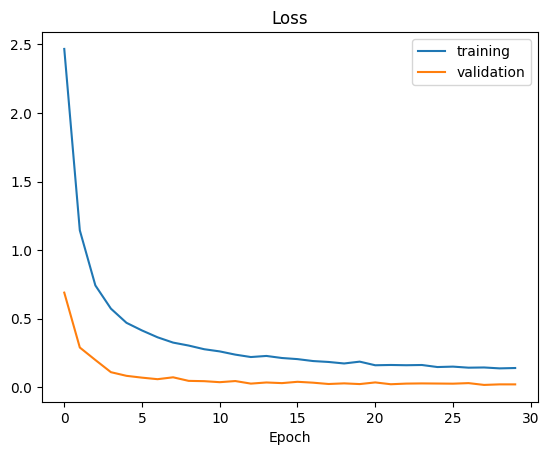

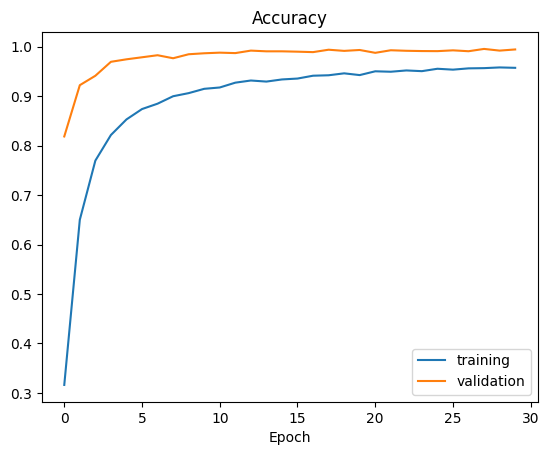

Test Score: 0.020630985498428345
Test Accuracy: 0.9949712753295898


In [29]:
# Vẽ biểu đồ Loss qua từng epoch
plt.figure(1)
plt.plot(history.history['loss'])        # Loss trên tập huấn luyện
plt.plot(history.history['val_loss'])    # Loss trên tập xác thực (validation)
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

# Vẽ biểu đồ Accuracy qua từng epoch
plt.figure(2)
plt.plot(history.history['accuracy'])        # Accuracy trên tập huấn luyện
plt.plot(history.history['val_accuracy'])    # Accuracy trên tập xác thực
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('Epoch')

plt.show()

# Đánh giá mô hình trên tập kiểm tra (test set)
score = model.evaluate(X_test, y_test, verbose=0)  # Trả về [loss, accuracy]

# In ra kết quả đánh giá
print('Test Score:', score[0])       # Giá trị mất mát (loss) trên tập kiểm tra
print('Test Accuracy:', score[1])    # Độ chính xác trên tập kiểm tra


## STORE THE MODEL AS A PICKLE OBJECT

In [30]:
# Lưu mô hình đã huấn luyện bằng thư viện pickle dưới dạng nhị phân
pickle_out = open("model_trained_epoch30.p", "wb")  # 'wb' = ghi dưới dạng nhị phân (write binary)
pickle.dump(model, pickle_out)  # Ghi đối tượng model vào file
pickle_out.close()  # Đóng file sau khi ghi xong

cv2.waitKey(0)  # Đợi người dùng nhấn phím bất kỳ để tiếp tục (chỉ có tác dụng nếu đang mở cửa sổ ảnh bằng OpenCV)


-1